# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек.
Выполнила студентка гр. 9382 Сорочина Мария, вариант 85.

# Цель работы.
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

# Основные теоретические положения.
###  Бинарный метод вычисления степени.
Бинарное (двоичное) возведение в степень — это приём, позволяющий возводить любое число в n-ую степень за O(log n) умножений (вместо n умножений при обычном подходе).  
$\lambda(n)=\lfloor log_2 n\rfloor$  
$\nu(n)$ - вес Хэминга. Сумма цифр в бинарной записи числа n.  
$\lambda(n)+\nu(n)-1$ -количество операций для бинарного метода.

### Метод множителей.
Если нужно возвести число в степень k и k составное число, то можно сначала возвести в степень i, а потом полученное число возвести в степень j, при k = i * j, i - наименьший простой множитель k. Если k - простое, то можно посчитать $x^(k-1 )$, а после домножить на $x$.

### Аддитивные цепочки.
Аддитивной цепочкой для $n\in N$ называют последовательность натуральных чисел $1=a_0, a_1, a_2, ..., a_m = n$, где $a_i=a_j+a_k$, $k\leq j<i$ для всех $i \in \{1...m\}$

#### Теорема.
Для $k<log_2 log_2 n$ справедливо
$l(n)<(1+k^{-1})\lceil log_2 n\rceil+2^{k-1}-k+2$.

Следствия:
1. $lim_{x\to\infty}\frac{l(n)}{\lambda (n)}=1$
2. Одна из наилучших верхних оценок имеет вид: $\lambda (n)(1+\frac{1}{\lambda(\lambda (n))}+\frac{O(\lambda(\lambda(\lambda (n)))}{(\lambda(\lambda (n)))^2})$

### Алгоритм Брауэра.
Алгоритм Брауэра вычисляет степень n за $log_2 n+\frac{(1+O(1))log_2 n}{log_2 log_2 n}$ операций.
Для заданных n, k $\geq 2$
$B_k(n)=\begin{cases}
1,2,3,...,2k-1,\quad \textrm{если} \quad n<2^k\\
B_k(q),2q,4q,...,2^kq,n,\quad \textrm{если} \quad n\geq2^k, q = \lfloor n/2^k\rfloor
\end{cases}$

### Алгоритм Яо.
n, k $\geq 2$.
$n=\Sigma_{i=0}^j c_i2^{ik}, \quad c_i \ne 0$.
d(z) - сумма чисел $2^{ik}$ для  всех i таких, что $c_i = z$.
Сначала в цепочку добавляются все степени двойки, непревосходящие числа n $Y_k(n)=\{1,2,4,...,2^{\lambda (n)}\}$, затем вычисляется d(z) для всех $z\in \{1,2,3,...,2^k-1\}$, $d(z) \ne 0$. Тогда $n=\Sigma_{z=1}^{2^{k-1}}zd(z)$. Для всех ненулевых d(z) вычисляем zd(z) при помощи бинарного метода, все промежуточные результаты добавляем в цепочку.

### Алгоритм дробления вектора индексов.
Звездная цепочка - цепочка, в которой каждый элемент получен по следующему правилу: $a_i=a_{i-1}+a_k, \quad 0\leq k\leq i-1$.

Определение.
Пусть есть звездная цепочка длины m-1 вида $\{a_i\}_{i=1}^{m}$, $a_1=1$. Для каждой звездной цепочки существует вектор индексов $\{r_i\}_{i=1}^{m-1}$ длины m-1 такой, что $r_i=\{x:1\leq x\leq i\}$ $\Rightarrow$ $a_i=a_{i-1}+a_{r_{i-1}}, \quad i \in \{2,...m\}$

#### Алгоритм.
Дано $n\in N$, найти $min l^*(n)=m:a_m=n$.
1. Внешний цикл: $\underline{l}(n)\leq m \leq \overline{l}(n)$. Выбираем натуральное число q $1\leq q\leq m-1$.
2. Внутренний цикл перебора всех $\{r_i\}_{i=1}^{q}$. (q! шагов)
Для каждого $\{r_i\}_{i=1}^{m}$ строим звездную цепочку $\{a_i\}$, вычисляем $a_{min}$ и $a_{max}$.  
а) Если $a_m = n$, то задача решена  
б) Если $n \notin [a_{min}, a_{max}]$, то переходим к следующему набору $\{r_i\}_{i=1}^{q}$.  
в) Если $n \in [a_{min}, a_{max}]$, то осуществляется внутренний цикл перебора меняющейся части $\{\rho_{j}\}_{j=q+1}^{m}$. Таких наборов m!/q!. $\{r_i\}\to\{a_i\}$  
г) Если $a_m = n$, то задача решена.  
д) Если $\rho_j=1$ для всех j, то переход к следующему $\{r_i\}_{i=1}^{q}$
3. Если все элементы равны 1, то увеличиваем m на 1.  

### Гипотеза Шольца-Брауэра.
$l^*(2^n-1)\leq l^*(n)+n-1$


# Постановка задачи.
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

# Порядок выполнения работы.
1. Применить бинарный метод и метод множителей для $x^n$, где n⩾30, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при n>500. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для n=1..200 путём построения функции l(n) и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для 1<n⩽10 на алгоритме дробления вектора индексов. Сделать выводы.
6. **Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

# Выполнение работы.
## 1. Вычисление степеней бинарным методом и методом множителей.
### 1.1. Бинарный метод.

In [9]:
def binary(x, n):
    counter = 0
    binn = str(bin(n)[3::])
    res = x
    for i in binn:
        if i == '1':
            res *= res
            res *= x
            counter +=2
        else:
            res *= x            
            counter += 1
    return [res, counter]
ans = binary(1, 31)
print("1^31 = {} \tNumber of operations: {}".format(ans[0], ans[1]))          

1^31 = 1 	Number of operations: 8


### 1.2. Метод множителей

In [8]:
def prime_f(n):
    if n%2 == 0: return 2
    i = 3
    while n%i != 0 and i*i <= n:
        i+= 2
    if i*i <= n: return i
    return n

def multipl(x, n):
    flag = 0
    counter = 0
    i = prime_f(n)
    if (i == n):
        flag = 1
        i = 2
        j = (n - 1) // i
    else:
        j = n // i
    fori = binary(x, i)
    res = fori[0]
    counter = fori[1]
    forj = binary(res, j)
    res = forj[0]
    counter += forj[1]
    if flag == 1:
        res *= x
        counter += 1
    return [res, counter]
ans = multipl(1, 31)
print("1^31 = {} \tNumber of operations: {}".format(ans[0], ans[1]))  

1^31 = 1 	Number of operations: 8


### 1.3. Сравнение методов на примерах

In [10]:
examples = [85, 33, 2910]
for i in examples:
    binMeth = binary(1, i)
    multiplMeth = multipl(1, i)
    print("Binary method. 1 ^ {} = {} \tNumber of operations: {}".format(i, binMeth[0], binMeth[1]))
    print("Multiply method. 1 ^{} = {} \tNumber of operations: {}\n".format(i,multiplMeth[0],multiplMeth[1]))

Binary method. 1 ^ 85 = 1 	Number of operations: 9
Multiply method. 1 ^85 = 1 	Number of operations: 8

Binary method. 1 ^ 33 = 1 	Number of operations: 6
Multiply method. 1 ^33 = 1 	Number of operations: 7

Binary method. 1 ^ 2910 = 1 	Number of operations: 18
Multiply method. 1 ^2910 = 1 	Number of operations: 18



### 1.4. Вывод.
Как видно из тестов, нельзя однозначно сказать, что какой-то метод работает лучше. В целом отличия по количеству операций незначительны.

## 2. Алгоритм Брауэра.
### 2.1. Реализация


In [18]:
def brauer(n, k):
    chain = []
    twoink = pow(2,k)
    if n < twoink:
        for i in range(1, twoink):
            if chain.count(i)==0:
                chain.append(i)
    else:
        q = n // twoink
        chain += brauer(q,k)
        for i in range(1, k+1):
            if pow(2,i)*q not in chain:
                chain.append(pow(2,i)*q)
        chain.append(n)
    return chain



testn =[42, 75, 258, 712, 1246]
for n in testn:
    for k in range(2,6):
        ex = brauer(n, k)
        print ("({},{}) chain {} length {}\n".format(n, k, ex, len(ex)))
    print('----------------------------------')
    

(42,2) chain [1, 2, 3, 4, 8, 10, 20, 40, 42] length 9

(42,3) chain [1, 2, 3, 4, 5, 6, 7, 10, 20, 40, 42] length 11

(42,4) chain [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 32, 42] length 18

(42,5) chain [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 42] length 33

----------------------------------
(75,2) chain [1, 2, 3, 4, 4, 8, 16, 18, 36, 72, 75] length 11

(75,3) chain [1, 2, 3, 4, 5, 6, 7, 8, 9, 18, 36, 72, 75] length 13

(75,4) chain [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 32, 64, 75] length 19

(75,5) chain [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 64, 75] length 34

----------------------------------
(258,2) chain [1, 2, 3, 4, 4, 8, 16, 16, 32, 64, 64, 128, 256, 258] length 14

(258,3) chain [1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 32, 64, 128, 256, 258] length 15

(258,4) chain [1, 2, 3, 4, 5, 6, 7, 8, 9, 

Минимальные аддитивные цепочки:  
42:   [1.2,4,8,16,32,10,42]  **длина = 8**  
75:   [1,2,4,8,9,18,36,37,74,75]  **длина = 10**  
258:  [1,2,4,8,16,32,64,128,129,258]  **длина = 10**  
712:  [1,2,4,5,10,11,22,44,88,89,178,356,712]  **длина = 13**  
1246: [1,2,4,8,9,18,19,38,76,77,154,155,310,311,622,623,1246]  **длина = 17**  

### 2.2. Вывод
При варьировании параметра k в алгоритме Брауэра, было замечено, что длина цепочки растет вместе с значением k. При k равном 2 в некоторых случаях длина цепочки совпадает с минимальной или близка к 

## 3.Алгоритм дробления вектора.
### 3.1. Реализация


In [19]:
from time import time 
#import math

def nu(n):
    binn = bin(n)[2::]
    counter = 0;
    for i in binn:
        if(i == '1'):
            counter += 1
    return counter

def isAll1(vector):
    for i in vector:
        if i != 1:
            return 0
    return 1

def r_to_a(r):
    a = [1]
    i = 1
    for ri in r:
        a.append(a[i-1]+a[ri-1])
        i += 1
    return a

def changeInd(r):
    i = 0
    r.reverse()
    for ind in r:
        if ind != 1:
            break
        i+=1
    r[i] -= 1;
    m = len(r)
    while i > 0:
        i -= 1
        r[i] = m-i
    r.reverse()
    return r

def vect(n):
    vector = []
    for m in range(int(ceil(log(n,2))), int(floor(log(n,2)+nu(n)))):
        q = m // 2
        r_q = []
        for index in range(1, q+1):
            r_q.append(index)       #заполнили фикс. часть
        change = m - q + (m+1)%2
        while 1:
            rMax = []+r_q
            rMin = []+r_q
            for index in range(change, m+1):
                rMax.append(index)
                rMin.append(1)
            aMax = r_to_a(rMax)
            aMin = r_to_a(rMin)
            if aMax[-1] == n:
                return aMax
            if aMin[-1] == n:
                return aMin
            if n > aMin[-1] and n < aMax[-1]:
                rho = []
                for i in range(change, m+1):
                    rho.append(i)
                while not isAll1(rho):
                    r = r_q + rho
                    a = r_to_a(r)
                    if a[-1] == n:
                        return a
                    rho = changeInd(rho)
            if isAll1(r_q):
                break
            r_q = changeInd(r_q)

            
tests = [501, 602, 703, 804, 905]       
for i in tests:
    print("n = {}".format(i))
    start = time() 
    tst = vect(i)
    end = time()
    print ("Vector\nchain {}\ntime {}\nlength {}".format(tst, end-start, len(tst)))
    start = time() 
    tst = brauer(i, 2)
    end = time()
    print ("Brauer\nchain {}\ntime {}\nlength {}\n".format(tst, end-start, len(tst)))


n = 501
Vector
chain [1, 2, 4, 8, 16, 24, 25, 50, 100, 200, 400, 500, 501]
time 9.97433590889
length 13
Brauer
chain [1, 2, 3, 4, 7, 14, 28, 31, 62, 124, 125, 250, 500, 501]
time 4.60147857666e-05
length 14

n = 602
Vector
chain [1, 2, 4, 8, 16, 32, 33, 66, 132, 264, 528, 594, 602]
time 7.00758314133
length 13
Brauer
chain [1, 2, 3, 4, 8, 9, 18, 36, 37, 74, 148, 150, 300, 600, 602]
time 4.60147857666e-05
length 15

n = 703
Vector
chain [1, 2, 4, 8, 16, 18, 19, 38, 76, 152, 304, 608, 684, 703]
time 78.8391618729
length 14
Brauer
chain [1, 2, 3, 4, 8, 10, 20, 40, 43, 86, 172, 175, 350, 700, 703]
time 4.6968460083e-05
length 15

n = 804
Vector
chain [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 768, 772, 804]
time 3.72035813332
length 13
Brauer
chain [1, 2, 3, 6, 12, 12, 24, 48, 50, 100, 200, 201, 402, 804, 804]
time 6.29425048828e-05
length 15

n = 905
Vector
chain [1, 2, 4, 5, 9, 14, 28, 56, 112, 224, 448, 896, 905]
time 22.2332568169
length 13
Brauer
chain [1, 2, 3, 6, 12, 14, 28, 56, 56, 11

### 3.2. Вывод.
Было преведено несколько тестов для сравнения алгоритма дробления вектора индексов и алгоритма Брауэра. Исходя из результатов тестирования, можно говорить, что при помощи метода дробления векторов получается длина цепочки меньше чем при помощи алгоритма Брауэра. По времени алгоритм Брауэра работает быстрее в большинстве примеров.

## 4. Проверка следствия теоремы Брауэра.
### 4.1. Реализация


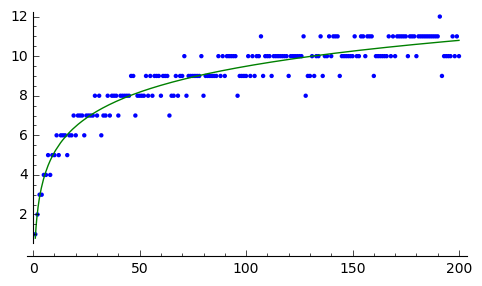

In [113]:
g = [(x1, len(vect(x1))) for x1 in range(1, 201)]
var('m,n,x')
q(x) = m*log(x,2)+n
mn = find_fit(g,q,solution_dict=1)
f(x) = mn[m]*log(x,2)+mn[n]
show(plot(f(x), (x, 1, 200), color = 'green')+list_plot(g), figsize=[5,3])


### 4.2. Вывод.
По получившемуся графику видно, что построенная функция близка к функции $l(n)$, что подтверждает следствие теоремы.  

## 5. Проверка гипотезы Шольца-Брауэра.
### 5.1. Реализация.


In [108]:
for n in range(2,11):
    print("n {}\t {} <= {}".format(n,len(vect(pow(2,n)-1)),len(vect(n))+n-1))

n 2	 3 <= 3
n 3	 5 <= 5
n 4	 6 <= 6
n 5	 8 <= 8
n 6	 9 <= 9
n 7	 11 <= 11
n 8	 11 <= 11
n 9	 13 <= 13
n 10	 14 <= 14


### 5.2. Вывод.
Гипотеза была проверена для значений $n \in \{2,..10\}$, для всех проверенных значений гипотеза подтвердилась.

# Общий вывод.
В ходе выполнения работы были изучены и реализованы алгоритмы нахождения минимальных аддитивных цепочек: бинарный метод, метод множителей, алгоритм Брауэра, алгоритм дробления вектора индексов. Также были проверены следствие теоремы Брауэра и гипотеза Шольца-Брауэра.